# Project: 'ml_Titanic'

## Part 1: Data Analysis 

In [1]:
# Import packages
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline


plt.style.use('ggplot')

In [2]:
# Load data
dir_data = './data/'

train_file = os.path.join(dir_data, 'train.csv')
test_file = os.path.join(dir_data, 'test.csv')

train_df = pd.read_csv(train_file)

### Data summary

In [3]:
# A quick look at data
print('Data summary:')
train_df.info()

Data summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
print(train_df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [5]:
# check columns with 'Object' type
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dimic, Mr. Jovan",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [6]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
print('Data columns:')
print(train_df.columns.values)

Data columns:
['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [9]:
print('Data types:')
train_df.get_dtype_counts()

Data types:


float64    2
int64      5
object     5
dtype: int64

### Outliers check 

Numbers of original columns: 7
Numbers of remained columns: 6


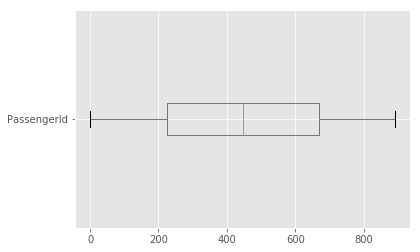

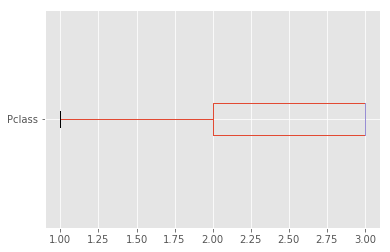

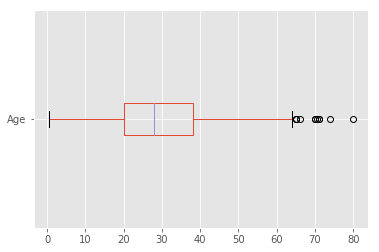

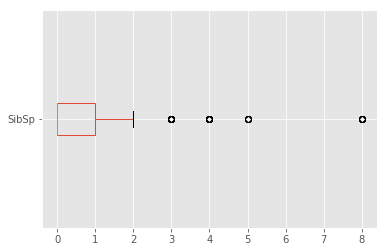

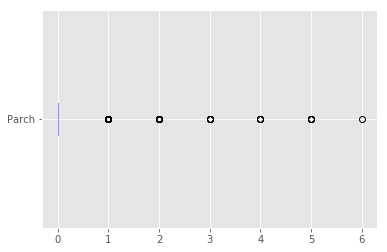

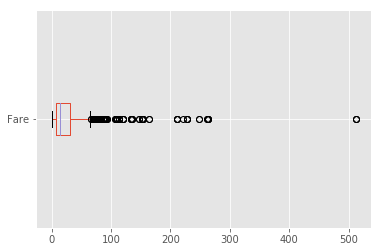

In [10]:
# 先篩選數值型的欄位
numeric_columns = train_df.select_dtypes(include=['number'])
print("Numbers of original columns: %d" % len(numeric_columns.columns))

# 再把只有 2 值 (通常是 0,1) 的欄位去掉
for col in numeric_columns:
    if numeric_columns[col].nunique() == 2:
        numeric_columns = numeric_columns.drop(col, axis=1)

print("Numbers of remained columns: %d" % len(numeric_columns.columns))

# 檢視這些欄位的數值範圍
for col in numeric_columns:
    numeric_columns[col].plot.box(vert=False)
    plt.show()

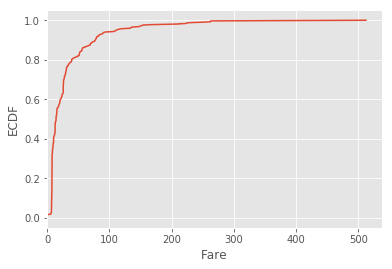

In [11]:
# 繪製 Empirical Cumulative Density Plot (ECDF)
data = train_df['Fare']
cdf = data.value_counts().sort_index().cumsum()*1./len(data)

plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Fare')
plt.ylabel('ECDF')
plt.xlim([cdf.index.min(), cdf.index.max() * 1.05]) # 限制顯示圖片的範圍
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

plt.show()

/Users/alfred/anaconda3/envs/ML100-Days/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


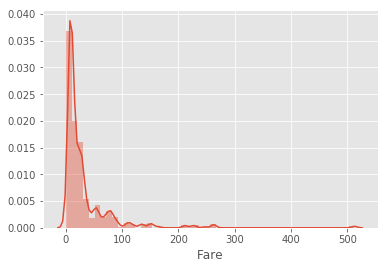

In [12]:
import seaborn as sns

# 顯示 Fare 與目標值的散佈圖
sns.distplot(train_df['Fare'])
plt.show()

### Correlation Coefficient 

In [12]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in train_df:
    if train_df[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(train_df[col].unique())) <= 2:
            # Train on the training data
            le.fit(train_df[col])
            # Transform both training and testing data
            train_df[col] = le.transform(train_df[col])
            #test_df[col] = le.transform(test_df[col])
            
            # Test codes here
            print('Label encoding count', le_count, ':', col, ':', le.classes_ )
           
            # Keep track of how many columns were label encoded
            le_count += 1


# Apply one-hot encoding
#train_df = pd.get_dummies(train_df)
#test_df = pd.get_dummies(test_df)

Label encoding count 0 : Sex : ['female' 'male']


In [13]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [14]:
# Calculate correlation coefficient
corr_all = train_df.corr()['Survived']
print(corr_all)

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Sex           -0.543351
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64


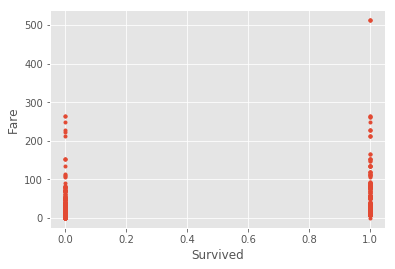

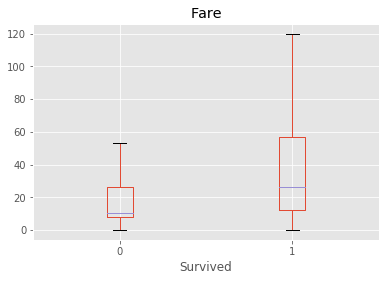

Correlation: 0.2573


In [15]:
# 繪圖觀察某個欄位和 Survived 之間的相關性
col = 'Fare'

plt.plot(train_df['Survived'], train_df[col], '.')
plt.xlabel('Survived')
plt.ylabel(col)
plt.show()

# Box plot
train_df.boxplot(column=col, by = 'Survived', showfliers = False)
plt.suptitle('')
plt.show()

print("Correlation: %.4f" % (corr_all[col]))

### 變項的分群比較: Bar & KDE

In [16]:
# 根據年齡分成不同組別 (年齡區間 - Survived與否)
age_data = train_df.loc[:, ['Survived', 'Age']]

# Continous to Discrete
bin_cut =  range(0, 80+1, 5)    #自 0 到 80 歲，5歲一個區間
age_data['Age_BINNED'] = pd.cut(age_data['Age'], bins = bin_cut)

print(age_data['Age_BINNED'].value_counts())
age_data.head()

(20, 25]    122
(25, 30]    108
(15, 20]     96
(30, 35]     88
(35, 40]     67
(40, 45]     47
(0, 5]       44
(45, 50]     39
(50, 55]     24
(5, 10]      20
(10, 15]     19
(55, 60]     18
(60, 65]     14
(70, 75]      4
(65, 70]      3
(75, 80]      1
Name: Age_BINNED, dtype: int64


,Survived,Age,Age_BINNED
0,0,22.0,"(20, 25]"
1,1,38.0,"(35, 40]"
2,1,26.0,"(25, 30]"
3,1,35.0,"(30, 35]"
4,0,35.0,"(30, 35]"


/Users/alfred/anaconda3/envs/ML100-Days/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/alfred/anaconda3/envs/ML100-Days/lib/python3.7/site-packages/seaborn/distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/Users/alfred/anaconda3/envs/ML100-Days/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/alfred/anaconda3/envs/ML100-Days/lib/python3.7/site-packages/numpy/lib/histograms.py:823: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/Users/alfred/anac

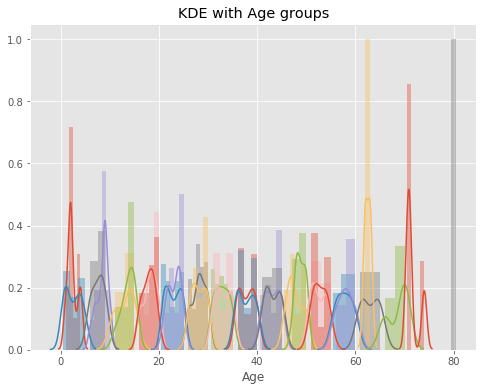

In [17]:
import seaborn as sns

# KDE (density plot)
age_group_sorted = age_data['Age_BINNED'].unique().sort_values()

plt.figure(figsize=(8,6))
for i in range(len(age_group_sorted)):
    sns.distplot(age_data.loc[(age_data['Age_BINNED'] == age_group_sorted[i]) & \
                              (age_data['Survived'] == 0), 'Age'], label = str(age_group_sorted[i]))
    
    sns.distplot(age_data.loc[(age_data['Age_BINNED'] == age_group_sorted[i]) & \
                              (age_data['Survived'] == 1), 'Age'], label = str(age_group_sorted[i]))

plt.title('KDE with Age groups')
plt.show()

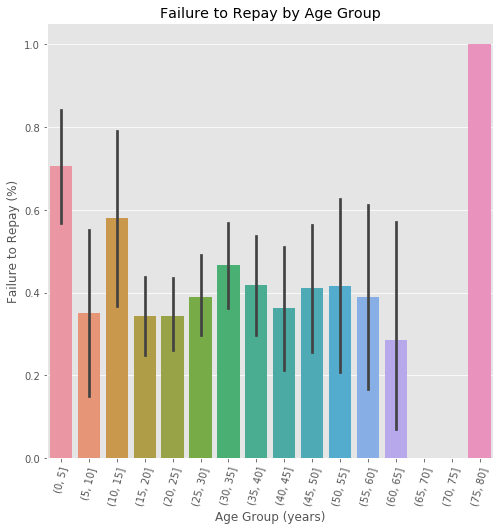

In [18]:
plt.figure(figsize = (8, 8))

# 以年齡區間為 x, target 為 y 繪製 barplot
px = 'Age_BINNED'
py = 'Survived'
sns.barplot(px, py, data=age_data)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');